In [1]:
!cd .. && mkdir build
!cd ../../build/ && rm -rf *
!cd ../../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/rociodcasco/miniconda3/envs/tp2/bin/python (found version "3.6.5") 
-- Found PythonLibs: /home/rociodcasco/miniconda3/envs/tp2/lib/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/mnt/c/Users/Rocío/Documents/GitHub/metnum_

In [2]:
# verifico version de python e importo metnum
!pwd
!python --version

import sys
import os

p = os.path.abspath('../')
sys.path.insert(1, p)

import metnum

/mnt/c/Users/Rocío/Documents/GitHub/metnum_tp2/notebooks/VariaciónMuestra
Python 3.6.5 :: Anaconda, Inc.


In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd

#Extraer dataset
df_train = pd.read_csv("../../data/train.csv")


In [4]:
# shuffle
df_train = df_train.sample(frac = 1)


In [5]:
def predict(X_train, y_train, X_val, alpha, k, con_pca):
    
    clf = metnum.KNNClassifier(k)
    
    if con_pca:
        
        pca = metnum.PCA(alpha)
        pca.fit(X_train)
        
        X_train = pca.transform(X_train)
        X_val = pca.transform(X_val)
        
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    
    return y_pred

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import time

acc_pred = []
prec_pred = []
recall_pred = []
total = len(df_train)

durationPerIteration = []


#cantidad inicial
inicio = 500
cantidadImg = []

while(inicio < len(df_train)):
    cantidadImg.append(inicio)
    inicio+=500
    
cantidadImg.append(len(df_train))

totalTimeSt = time.time()
for i in cantidadImg:
    print(f"aber: {i}")
    #Corto la muestra
    sample = df_train[:i]
    
    # Uso values para mandar todo a arrays de numpy
    X = sample[sample.columns[1:]].values
    y = sample["label"].values.reshape(-1, 1)

    
    #Separo train de validacion
    limit = int(0.8 * X.shape[0]) 

    X_train, y_train = X[:limit], y[:limit]
    X_val, y_val = X[limit:], y[limit:]
    
    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)
    
    print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
    
    #kNN con alpha y k optimos _en teoria_ y con PCA
    start = time.time()
    y_pred = predict(X_train, y_train, X_val, 40, 5, True)
    finish = time.time()
    
    #guardo las metricas
    acc = accuracy_score(y_val, y_pred)
    acc_pred.append(acc)
    
    prec = precision_score(y_val, y_pred, average='macro')
    #prec = precision_score(y_val, y_pred, average='micro')
    prec_pred.append(prec)
    
    recall = recall_score(y_val, y_pred, average='macro')
    #recall = recall_score(y_val, y_pred, average='micro')
    recall_pred.append(recall)
    
    #guardo el tiempo
    totalTime = finish-start
    durationPerIteration.append(totalTime)
    print(f"El tiempo de ejecución es: {totalTime}")
    
totalTimeF = time.time()

print(f"Tiempo total de ejecucion: {totalTimeF - totalTimeSt}")

aber: 500
Ahora tengo 400 instancias de entrenamiento y 100 de validación
El tiempo de ejecución es: 0.5056538581848145
aber: 1000
Ahora tengo 800 instancias de entrenamiento y 200 de validación
El tiempo de ejecución es: 0.1181485652923584
aber: 1500
Ahora tengo 1200 instancias de entrenamiento y 300 de validación
El tiempo de ejecución es: 0.6107234954833984
aber: 2000
Ahora tengo 1600 instancias de entrenamiento y 400 de validación
El tiempo de ejecución es: 0.5955321788787842
aber: 2500
Ahora tengo 2000 instancias de entrenamiento y 500 de validación
El tiempo de ejecución es: 1.0632381439208984
aber: 3000
Ahora tengo 2400 instancias de entrenamiento y 600 de validación
El tiempo de ejecución es: 0.7180221080780029
aber: 3500
Ahora tengo 2800 instancias de entrenamiento y 700 de validación
El tiempo de ejecución es: 0.7716538906097412
aber: 4000
Ahora tengo 3200 instancias de entrenamiento y 800 de validación
El tiempo de ejecución es: 0.41346120834350586
aber: 4500
Ahora tengo 360

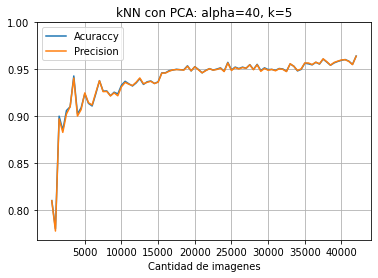

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting

plt.plot(cantidadImg, acc_pred)
plt.plot(cantidadImg, prec_pred)

plt.xlabel('Cantidad de imagenes')
plt.title("kNN con PCA: alpha=40, k=5")
plt.legend(["Acuraccy", "Precision"])
plt.grid()

plt.yticks([0.8,0.85, 0.9,0.95, 1])
plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000])

plt.savefig("METRICSTest2.jpg")
plt.show()

In [40]:
print(cantidadImg[-1])
print(acc_pred[-1])

print(acc_pred[-1] - acc_pred[39])

print(durationPerIteration[-1] - durationPerIteration[39])

42000
0.964047619047619
0.011297619047619056
8.86499834060669


In [8]:
maximoACC = max(acc_pred)
maximoPREC = max(prec_pred)
indACC = acc_pred.index(maximoACC)
indPREC = prec_pred.index(maximoPREC)

print(f"El maximo Accuracy es {maximoACC} y se alcanza con {cantidadImg[indACC]} imagenes")
print(f"La máxima Precision es {maximoPREC} y se alcanza con {cantidadImg[indPREC]} imagenes")

El maximo Accuracy es 0.964047619047619 y se alcanza con 42000 imagenes
La máxima Precision es 0.963892391113875 y se alcanza con 42000 imagenes


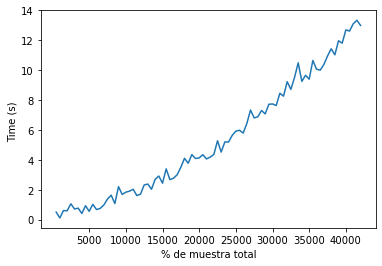

In [44]:
plt.plot(cantidadImg, durationPerIteration)

plt.xlabel('% de muestra total')
plt.ylabel("Time (s) ")

plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000])

plt.savefig("TIMETest2.jpg")
plt.show()

In [43]:
import pandas as pd
# cantidadImg, accuracy, precision, time

aber = {'cantidadImg': cantidadImg, 'accuracy': acc_pred, 'precision': prec_pred, 'time': durationPerIteration}

xd = pd.DataFrame(aber)
xd.to_csv('datosTest2.csv')